<html>
    <header>
        <body> 
            <font size="6">1. Cargar librerías a utilizar </font>
        </body>
    </header>
</html>

In [1]:
import sys, os, json
import time
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn_genetic import GASearchCV
from sklearn_genetic import ExponentialAdapter
from sklearn_genetic.space import Continuous, Integer, Categorical


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_seq_items', None)

seed = 42

### Definición de funciones

In [2]:
def boxplots_data(data):
    for var in data:

        x = data[var].values

        # Se crea el espacio para los gráficos
        fig, ((ax1, ax2)) = plt.subplots(1, 2,  figsize=(10, 4))
        # Se grafica el boxplot

        ax1.boxplot(x)
        ax1.set_title( 'Boxplot for {}'.format(var) )

        # Se grafica el histograma

        ax2.hist(x, bins=30)
        ax2.set_title( 'Histogram for {}'.format(var) )
        plt.show()

<html>
    <header> <br>
        <body> 
            <font size="6">2. Lectura de insumos </font><br>
        </body>
    </header>
</html>

In [5]:
df = pd.read_csv("src/bank.csv",sep=";")
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [6]:
df["y"] = (df["y"]=="yes").astype(int)
df_x = df.drop(["y"],axis=1)
df_y = df[["y"]]

In [7]:
df_x.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [8]:
df_y.head(5)

,y
0,0
1,0
2,0
3,0
4,0


<html>
    <header> <br>
        <body> 
            <font size="6">3. Descriptivo de variables </font><br><br>
        </body>
    </header>
</html>

### Cantidad de registros y columnas

In [9]:
print(f"{df_x.shape[0]} Registros y {df_x.shape[1]} Columnas")

4119 Registros y 20 Columnas


### Información general

In [10]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

### Descriptivo variables numéricas

In [12]:
df_x.select_dtypes(include=['int64','float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
age,4119.0,40.113620,10.313362,18.000,32.000,38.000,47.000,88.000
duration,4119.0,256.788055,254.703736,0.000,103.000,181.000,317.000,3643.000
campaign,4119.0,2.537266,2.568159,1.000,1.000,2.000,3.000,35.000
pdays,4119.0,960.422190,191.922786,0.000,999.000,999.000,999.000,999.000
previous,4119.0,0.190337,0.541788,0.000,0.000,0.000,0.000,6.000
emp.var.rate,4119.0,0.084972,1.563114,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,4119.0,93.579704,0.579349,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,4119.0,-40.499102,4.594578,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,4119.0,3.621356,1.733591,0.635,1.334,4.857,4.961,5.045
nr.employed,4119.0,5166.481695,73.667904,4963.600,5099.100,5191.000,5228.100,5228.100


### Descriptivo variables categóricas

In [13]:
df_x.select_dtypes(include=['object']).describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523


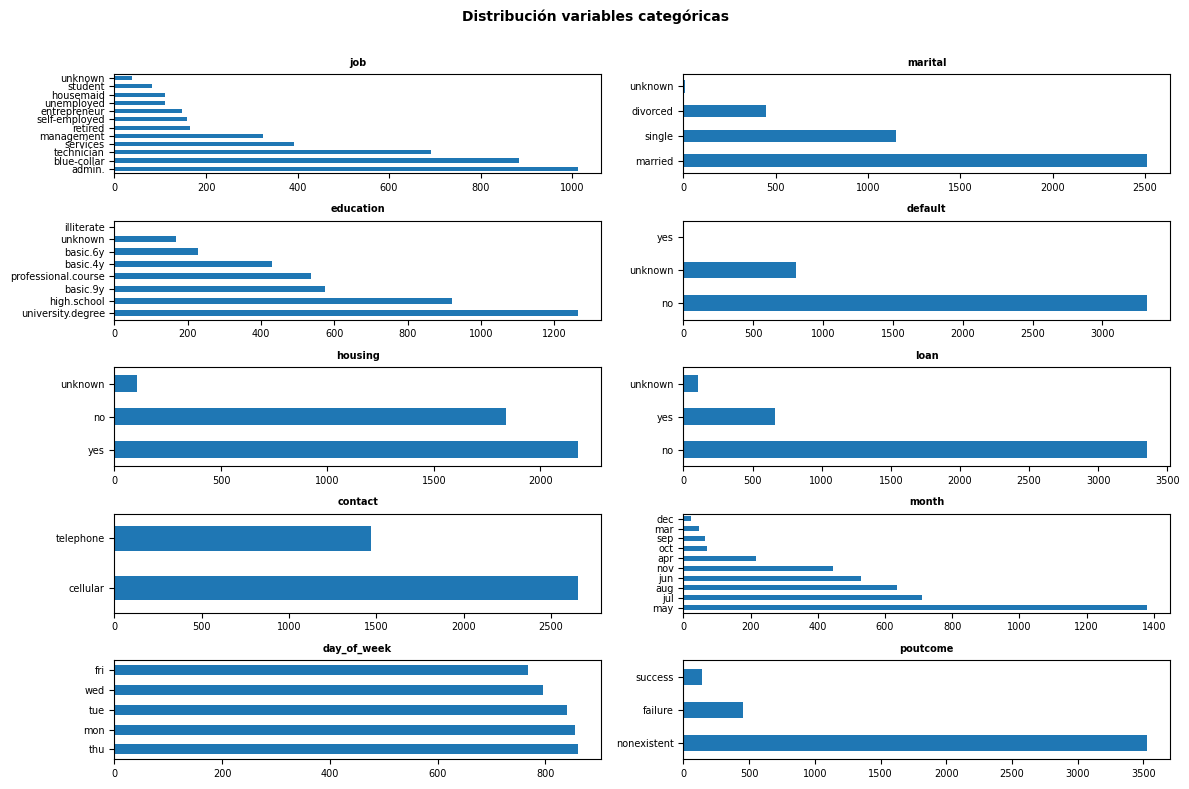

In [19]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 7)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables categóricas',
             fontsize = 10, fontweight = "bold");

### Valores nulos

In [20]:
df_x.isna().sum().sort_values(ascending=False)

age               0
job               0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
campaign          0
duration          0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
nr.employed       0
dtype: int64

### Boxplots e Histogramas

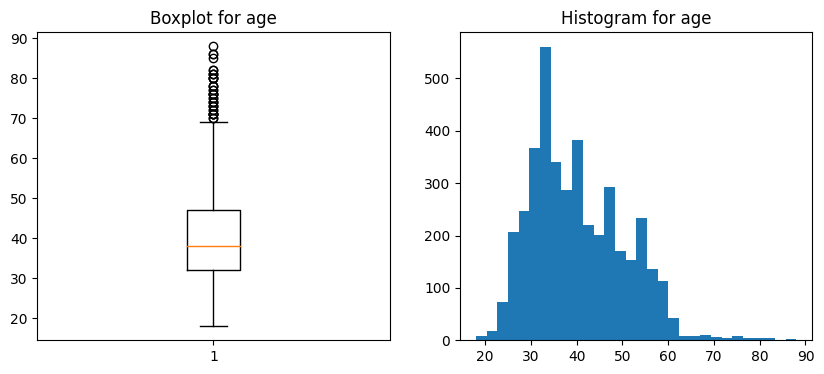

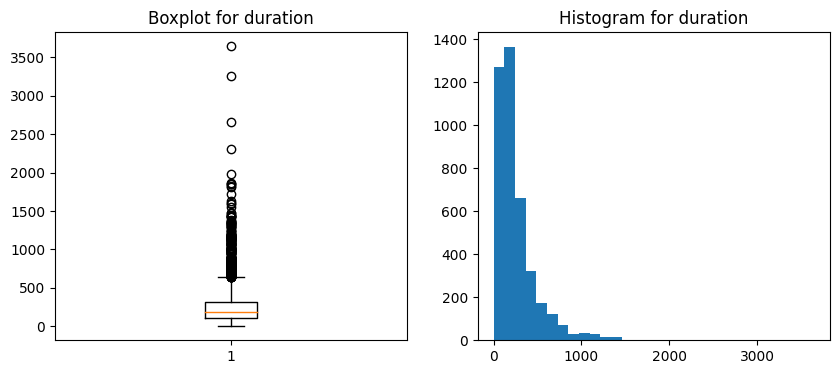

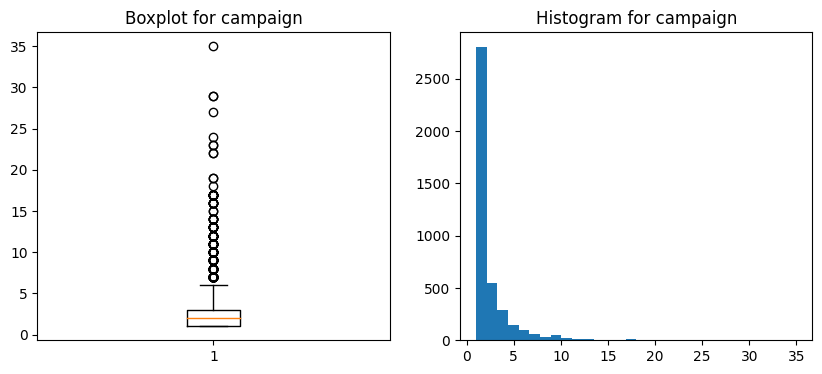

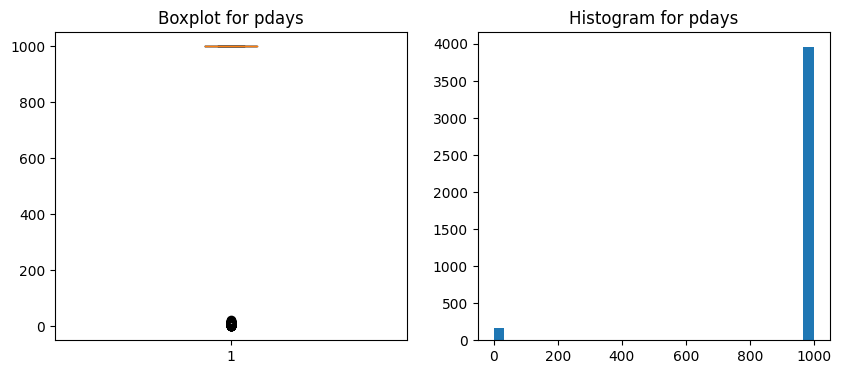

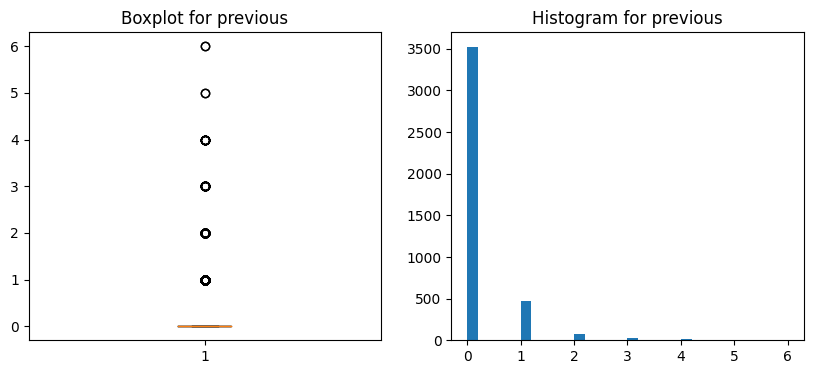

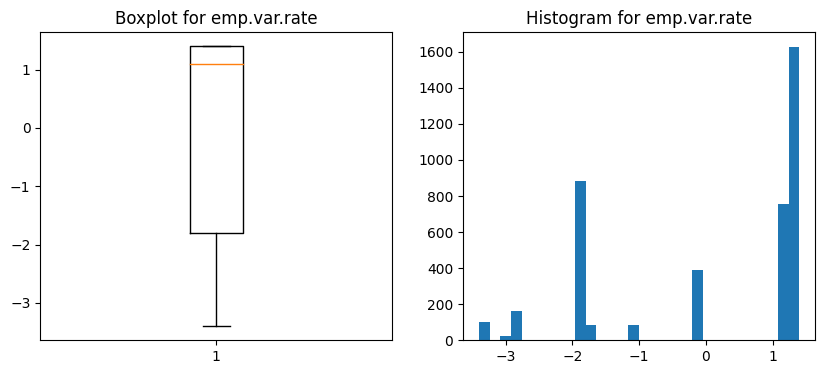

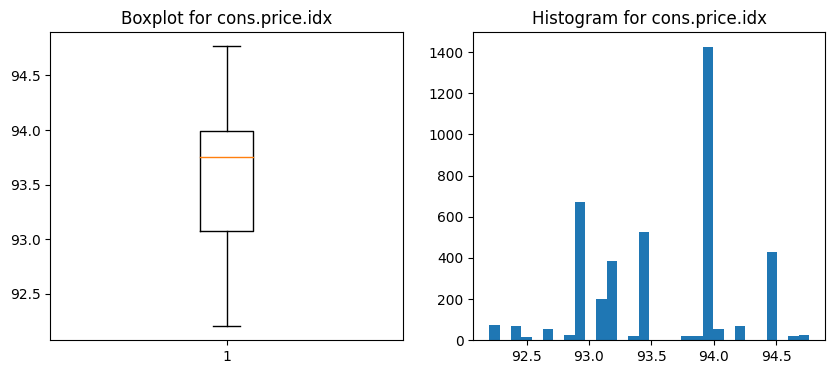

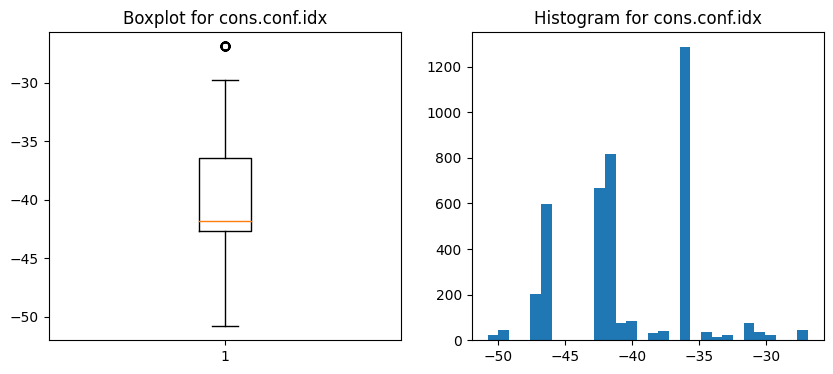

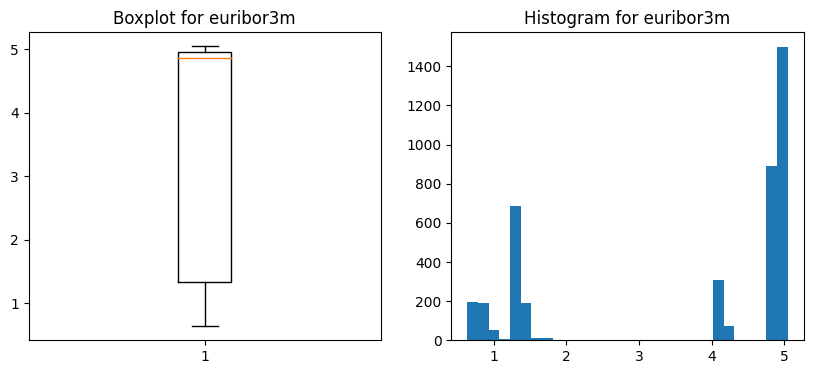

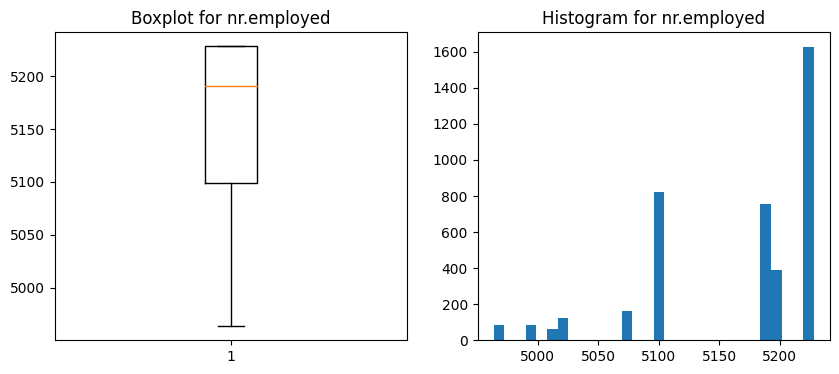

In [23]:
boxplots_data(df_x.select_dtypes(include=['int64','float64']))

<html>
    <header> <br>
        <body> 
            <font size="6">4. Transformación de variables categóricas</font><br><br>
        </body>
    </header>
</html>

In [28]:
df_x["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [29]:
df_x["education"] = np.where(df_x["education"]=="basic.4y", "Basic", df_x["education"])
df_x["education"] = np.where(df_x["education"]=="basic.6y", "Basic", df_x["education"])
df_x["education"] = np.where(df_x["education"]=="basic.9y", "Basic", df_x["education"])

df_x["education"] = np.where(df_x["education"]=="high.school", "High School", df_x["education"])
df_x["education"] = np.where(df_x["education"]=="professional.course", "Professional Course", df_x["education"])
df_x["education"] = np.where(df_x["education"]=="university.degree", "University Degree", df_x["education"])

df_x["education"] = np.where(df_x["education"]=="illiterate", "Illiterate", df_x["education"])
df_x["education"] = np.where(df_x["education"]=="unknown", "Unknown", df_x["education"])

In [37]:
columnas_categoricas = df_x.select_dtypes(include=['object']).columns.to_list()
columnas_categoricas
df_cat = pd.get_dummies(df_x, columns=columnas_categoricas)
df_cat.columns = df_cat.columns.str.lower()
df_cat.columns = df_cat.columns.str.replace(" ","_")
df_cat.columns = df_cat.columns.str.replace(".","_")
df_cat.columns = df_cat.columns.str.replace("-","_")
df_cat.head(5)

C:\Users\PC\AppData\Local\Temp\ipykernel_14504\1042894332.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_cat.columns = df_cat.columns.str.replace(".","_")


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_admin_,job_blue_collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self_employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic,education_high_school,education_illiterate,education_professional_course,education_university_degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


<html>
    <header> <br>
        <body> 
            <font size="6">4. Análisis correlacional</font><br><br>
        </body>
    </header>
</html>

C:\Users\PC\AppData\Local\Temp\ipykernel_14504\2674923908.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_x.corr(method='pearson')


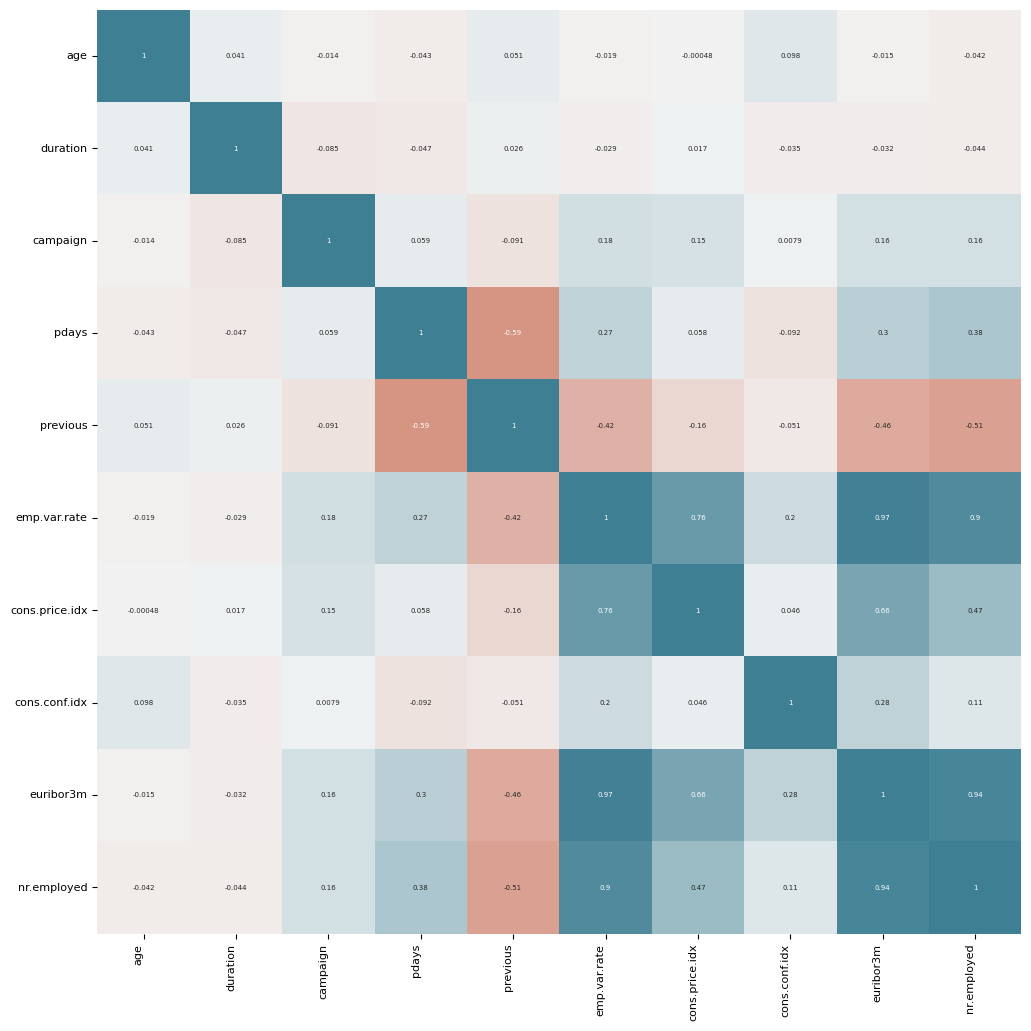

In [38]:
corr_matrix = df_x.corr(method='pearson')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 12))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 5},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 90,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

<html>
    <header> <br>
        <body> 
            <font size="6">5. Análisis por variables</font><br><br>
        </body>
    </header>
</html>

In [39]:
df_x.groupby("education").mean()

C:\Users\PC\AppData\Local\Temp\ipykernel_14504\2787956501.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_x.groupby("education").mean()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479


In [40]:
df_x.groupby(["marital"]).mean()

C:\Users\PC\AppData\Local\Temp\ipykernel_14504\4229602641.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_x.groupby(["marital"]).mean()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,45.107623,263.163677,2.542601,972.255605,0.174888,0.143274,93.600547,-40.621973,3.707177,5170.145964
married,42.389398,256.289757,2.527700,964.162216,0.173774,0.172260,93.599039,-40.357114,3.728554,5170.724472
single,33.209020,254.647875,2.555941,947.338248,0.233304,-0.128448,93.529971,-40.768257,3.352657,5155.756114
unknown,42.272727,336.272727,2.545455,999.000000,0.090909,0.181818,93.537545,-39.690909,3.855182,5174.409091


In [41]:
df_x.groupby(["job"]).mean()

C:\Users\PC\AppData\Local\Temp\ipykernel_14504\3485983483.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_x.groupby(["job"]).mean()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.240119,261.871542,2.642292,944.025692,0.192688,0.061462,93.527008,-40.014723,3.601909,5165.542885
blue-collar,39.265837,261.852941,2.432127,983.270362,0.147059,0.235520,93.669430,-41.571493,3.742370,5174.265611
entrepreneur,42.202703,249.202703,2.216216,992.263514,0.141892,0.263514,93.614682,-40.839865,3.931493,5180.600000
housemaid,45.672727,229.663636,2.463636,980.909091,0.100000,0.426364,93.658536,-39.324545,4.009182,5179.862727
management,42.429012,246.799383,2.432099,953.015432,0.246914,-0.049691,93.483056,-40.591667,3.553451,5165.971914
retired,60.873494,311.789157,2.397590,897.301205,0.325301,-0.580120,93.487506,-39.034337,2.875741,5126.062048
self-employed,40.679245,254.924528,2.817610,967.691824,0.207547,0.086164,93.575283,-40.323899,3.669296,5166.974843
services,38.513995,232.529262,2.844784,978.773537,0.178117,0.067684,93.626059,-41.532061,3.552776,5165.806870
student,26.695122,287.134146,1.951220,902.426829,0.487805,-1.192683,93.448329,-39.665854,2.165354,5092.046341


<html>
    <header> <br>
        <body> 
            <font size="6">6. Normalización</font><br><br>
        </body>
    </header>
</html>

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns = df_x.columns)
df_scaled.head(5)

### Validamos el efecto de la normalización en la correlación de los datos

In [ ]:
corr_matrix = df_scaled.corr(method='pearson')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 12))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 90,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

<html>
    <header> <br>
        <body> 
            <font size="6">7. Implementación de algoritmo: Regresión Logística</font><br><br>
        </body>
    </header>
</html>

<html>
    <header> <br>
        <body> 
            <font size="5">7.1 Implementación inicial con parámetros por defecto</font><br><br>
        </body>
    </header>
</html>

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_cat, df_y, train_size=0.7, random_state=seed)

In [43]:
X = X_train.values
y = np.ravel(y_train.values)

# Creamos un modelo de regresión logística
lr = LogisticRegression()

# Realizamos cross-validation con 5 folds
scores = cross_val_score(lr, X, y, cv=5, scoring="accuracy")

# Imprimimos los resultados de cada fold y la precisión media
print("accuracy por fold: ", scores)
print("accuracy medio: ", scores.mean())

accuracy por fold:  [0.91681109 0.91854419 0.90641248 0.91840278 0.91145833]
accuracy medio:  0.9143257750818409


D:\Ambientes Virtuales\env_maestria\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Ambientes Virtuales\env_maestria\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [44]:
lrmodel = LogisticRegression(random_state=seed)
lrmodel.fit(X, y)

y_pred = lrmodel.predict(X_test.values)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.9118122977346278


D:\Ambientes Virtuales\env_maestria\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
matriz_confusion = metrics.classification_report(y_test, y_pred) 
print(matriz_confusion)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1105
           1       0.64      0.39      0.48       131

    accuracy                           0.91      1236
   macro avg       0.78      0.68      0.72      1236
weighted avg       0.90      0.91      0.90      1236



<html>
    <header> <br>
        <body> 
            <font size="5">7.2 Búsqueda de hiperparámetros por algoritmo genético</font><br><br>
        </body>
    </header>
</html>

In [53]:
lrmodel_tuning = LogisticRegression(random_state=seed)

mutation_adapter = ExponentialAdapter(initial_value=0.8, end_value=0.2, adaptive_rate=0.1)
crossover_adapter = ExponentialAdapter(initial_value=0.2, end_value=0.8, adaptive_rate=0.1)

param_grid = {'tol'      : Continuous(0.00005, 0.0005),
              'solver'   : Categorical(['lbfgs', 'liblinear', 'saga']),
              'max_iter' : Integer(50, 200)}

cv = KFold(n_splits=5, shuffle=True)

evolved_estimator = GASearchCV(estimator=lrmodel_tuning,
                               cv=cv,
                               scoring='accuracy',
                               population_size=20,
                               generations=50,
                               mutation_probability=mutation_adapter,
                               crossover_probability=crossover_adapter,
                               param_grid=param_grid,
                               n_jobs=-1)

evolved_estimator.fit(X, y)

y_predict_ga = evolved_estimator.predict(X_test.values)

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	20    	0.91445	0.0031034  	0.919186   	0.909825   
1  	40    	0.917463	0.00149627 	0.919526   	0.915026   
2  	40    	0.918591	0.000850978	0.919527   	0.916406   
3  	40    	0.918645	0.00121431 	0.919872   	0.913978   
4  	40    	0.91873 	0.000782451	0.919872   	0.917102   
5  	40    	0.918695	0.000983512	0.920227   	0.916053   
6  	40    	0.918018	0.00129856 	0.920224   	0.915017   
7  	40    	0.918556	0.00106099 	0.920224   	0.916749   
8  	40    	0.918887	0.000753926	0.919875   	0.917443   
9  	40    	0.919008	0.000625765	0.919875   	0.918139   
10 	40    	0.919632	0.000550111	0.920915   	0.918484   
11 	40    	0.919441	0.0010856  	0.921957   	0.917788   
12 	40    	0.919167	0.00131597 	0.921957   	0.916762   
13 	40    	0.919339	0.00100677 	0.921611   	0.916759   
14 	40    	0.919371	0.000800821	0.920569   	0.917789   
15 	40    	0.919544	0.000970721	0.920914   	0.917786   
16 	40    	0.919425	0.00111767 	0.920925   	0.9174

D:\Ambientes Virtuales\env_maestria\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
print(evolved_estimator.best_params_)

{'tol': 9.315290333750543e-05, 'solver': 'lbfgs', 'max_iter': 182}


In [55]:
accuracy = metrics.accuracy_score(y_test, y_predict_ga)
print(accuracy)

0.9085760517799353


In [56]:
print(matriz_confusion)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1105
           1       0.64      0.39      0.48       131

    accuracy                           0.91      1236
   macro avg       0.78      0.68      0.72      1236
weighted avg       0.90      0.91      0.90      1236



In [57]:
matriz_confusion2 = metrics.classification_report(y_test, y_predict_ga) 
print(matriz_confusion2)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1105
           1       0.59      0.46      0.52       131

    accuracy                           0.91      1236
   macro avg       0.76      0.71      0.73      1236
weighted avg       0.90      0.91      0.90      1236

